# Problem: Predict the class of the flower based on available attributes.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
import seaborn as sns

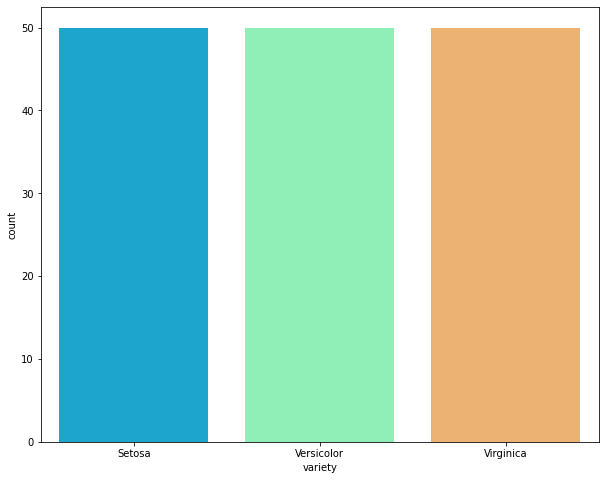

In [9]:
f, ax = plt.subplots(figsize=(10,8))
sns.countplot(x="variety", palette='rainbow', data=df)
plt.show()

In [10]:
# now we have the name lets plot scatter graph

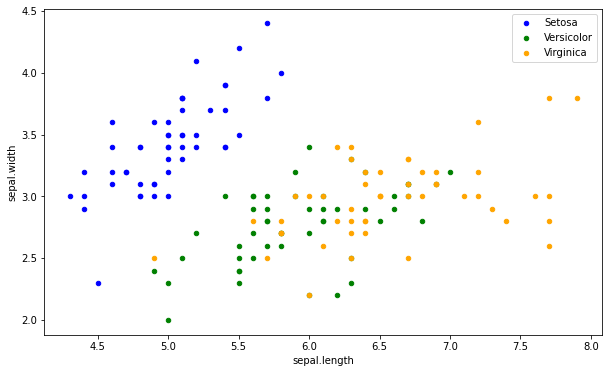

In [13]:
fig = df[df.variety=='Setosa'].plot.scatter(x='sepal.length',y='sepal.width',color='blue',label='Setosa')
r = df[df.variety=='Versicolor'].plot.scatter(x='sepal.length',y='sepal.width',color='green',label='Versicolor',ax=fig)
d = df[df.variety=='Virginica'].plot.scatter(x='sepal.length',y='sepal.width',color='orange',label='Virginica',ax=fig)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

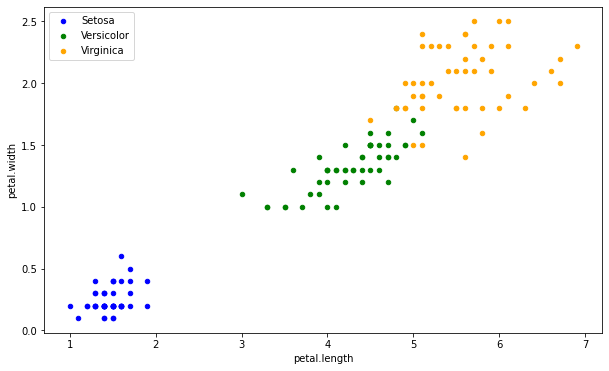

In [14]:
fig = df[df.variety=='Setosa'].plot.scatter(x='petal.length',y='petal.width',color='blue',label='Setosa')
r = df[df.variety=='Versicolor'].plot.scatter(x='petal.length',y='petal.width',color='green',label='Versicolor',ax=fig)
d = df[df.variety=='Virginica'].plot.scatter(x='petal.length',y='petal.width',color='orange',label='Virginica',ax=fig)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [15]:
encode = LabelEncoder()

In [16]:
df.variety= encode.fit_transform(df.variety)

In [17]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
train, test = train_test_split(df,test_size=0.2,random_state=0)

In [19]:
#separating independent and dependent variables
x_train = train.drop(['variety'],axis=1)
y_train = train['variety']

x_test = test.drop(['variety'],axis=1)
y_test= test['variety']

In [25]:
model = LogisticRegression(max_iter=120)
model.fit(x_train,y_train)

LogisticRegression(max_iter=120)

In [26]:
reg = model.predict(x_test)

In [27]:
print('Predicted Species : \n', encode.inverse_transform(reg))

Predicted Species : 
 ['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']


In [28]:
# Accuracy score

print('Accuracy score: ', accuracy_score(y_test,reg))

Accuracy score:  1.0
